# Digit Recognizer Using Convolutional Neural Network (CNN)

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero). by: kaggle.com

In [19]:
# importing python libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

In [5]:
# convert label into a one-hot vector [m,] --> [m,10]
# where 10 is no. of columns for 0's and 1's (equivalent to digits 0 to 9)
from keras.utils import to_categorical
y = to_categorical(y)

In [6]:
# reshape the array to extract image size: 28 x 28
m = X.shape[0]
X_new = np.zeros((m, 28, 28), dtype=float)
for i in range(m):
    digit = X[i].reshape(28, 28)
    X_new[i] = digit

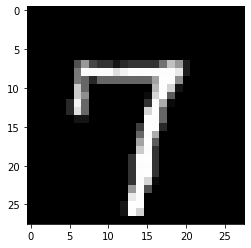

In [28]:
# view the image
single_image = X[6].reshape(28,28)
plt.imshow(single_image, cmap='gray')
plt.show()

In [ ]:
# reshape the array for tensorflow
X_new = np.reshape(X_new, [-1, 28, 28, 1])

In [7]:
# scaling the values to a range 0 to 1
X_new = X_new/ 255.0

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size = 0.10, random_state = 0)

In [9]:
# set parameters for convolutional network
num_labels = 10
input_shape = (28, 28, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

In [13]:
# Building the neural network requires configuring the layers of the model, then compiling the model.
# import tensorflow and keras libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size),
    keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'),
    keras.layers.MaxPooling2D(pool_size),
    keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(num_labels, activation='softmax')
])

In [14]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# train the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=10)

Train on 37800 samples
Epoch 1/10
37800/37800 [==============================] - 30s 781us/sample - loss: 0.3546 - accuracy: 0.8909
Epoch 2/10
37800/37800 [==============================] - 33s 879us/sample - loss: 0.0834 - accuracy: 0.9736
Epoch 3/10
37800/37800 [==============================] - 33s 878us/sample - loss: 0.0595 - accuracy: 0.9814
Epoch 4/10
37800/37800 [==============================] - 34s 890us/sample - loss: 0.0445 - accuracy: 0.9859
Epoch 5/10
37800/37800 [==============================] - 33s 886us/sample - loss: 0.0390 - accuracy: 0.9877
Epoch 6/10
37800/37800 [==============================] - 33s 875us/sample - loss: 0.0331 - accuracy: 0.9896
Epoch 7/10
37800/37800 [==============================] - 35s 921us/sample - loss: 0.0279 - accuracy: 0.9908
Epoch 8/10
37800/37800 [==============================] - 33s 867us/sample - loss: 0.0260 - accuracy: 0.9917
Epoch 9/10
37800/37800 [==============================] - 33s 882us/sample - loss: 0.0229 - accuracy: 0.9

In [16]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
print('\nTest accuracy:', test_acc)

4200/1 - 1s - loss: 0.1413 - accuracy: 0.9893

Test accuracy: 0.9892857


## Below lines are for kaggle knowledge competition:
This is to generate the submission csv file based on the given test data without the true/target label

In [13]:
# test dataset
test_data = test.iloc[:, :].values

In [14]:
# reshape the array for tensorflow
m = test_data.shape[0]
X_test = np.zeros((m, 28, 28), dtype=float)
for i in range(m):
    digit = test_data[i].reshape(28, 28)
    X_test[i] = digit
X_test = np.reshape(X_test, [-1, 28, 28, 1])

In [15]:
# scaling the values to a range 0 to 1
X_test = X_test/ 255.0

In [16]:
# make predictions
predictions = model.predict(X_test)

In [17]:
predictions_array = np.zeros((28000,1))
for i in range(28000):
    predictions_array[i] = np.argmax(predictions[i])

predictions_array = predictions_array.astype(int).ravel()

In [18]:
#import sample submission template
template = pd.read_csv('data/sample_submission.csv')

In [19]:
data = {'ImageId': template.ImageId, 'Label': predictions_array}
output = pd.DataFrame(data)
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
